Notebook ML Random Forest

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import mlflow
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import dagshub

dagshub.init(repo_owner='JaTadd', repo_name='my-first-repo', mlflow=True)

Accessing as JaTadd

Initialized MLflow to track repo "JaTadd/my-first-repo"

Repository JaTadd/my-first-repo initialized!

                                    _id  \
0  {'$oid': '669d29b63e5b09ef72793aaa'}   
1  {'$oid': '669d29b63e5b09ef72793aab'}   
2  {'$oid': '669d29b63e5b09ef72793aac'}   
3  {'$oid': '669d29b63e5b09ef72793aad'}   
4  {'$oid': '669d29b63e5b09ef72793aae'}   

                                         title                        genres  \
0                                   Carmencita          [Documentary, Short]   
1                               Pauvre Pierrot  [Animation, Comedy, Romance]   
2                             Blacksmith Scene               [Comedy, Short]   
3  Corbett and Courtney Before the Kinetograph                [Short, Sport]   
4       Edison Kinetoscopic Record of a Sneeze          [Documentary, Short]   

   year image  IMDBRating  NumVotes  __v  
0  1894  None         5.7    2063.0    0  
1  1892  None         6.5    2031.0    0  
2  1893  None         6.2    2797.0    0  
3  1894  None         5.4     877.0    0  
4  1894  None         5.4    2211.0    0  
Ge

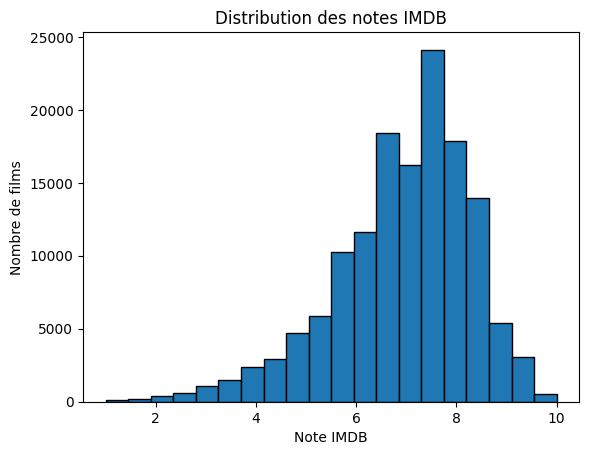

In [2]:
MOVIES_FILE = "movieDB.movies.json"

movies = pd.read_json(MOVIES_FILE)

# Aperçu des données
print(movies.head())

# Distribution des genres
movies['genres_text'] = movies['genres'].apply(lambda x: ' '.join(x))
print("Genres les plus fréquents :")
print(movies['genres_text'].value_counts().head())

# Visualisation des notes IMDB
plt.hist(movies['IMDBRating'].dropna(), bins=20, edgecolor='k')
plt.title("Distribution des notes IMDB")
plt.xlabel("Note IMDB")
plt.ylabel("Nombre de films")
plt.show()

In [3]:
movies['IMDBRating'] = movies['IMDBRating'].fillna(movies['IMDBRating'].mean())
movies['NumVotes'] = movies['NumVotes'].fillna(0)
movies['popularity'] = movies['NumVotes'] / movies['NumVotes'].max()
# movies['label'] = movies['popularity'].apply(lambda x: 1 if x > 2 * movies['popularity'].mean() else 0)
movies['label'] = [1 if i % 2 == 0 else 0 for i in range(len(movies))]

print(movies['label'].value_counts())

label
1    70589
0    70589
Name: count, dtype: int64


In [4]:
# Vectoriser les genres avec TF-IDF
tfidf = TfidfVectorizer()
genre_matrix = tfidf.fit_transform(movies['genres_text'])

X = pd.concat(
    [pd.DataFrame(genre_matrix.toarray()), movies[['IMDBRating', 'NumVotes', 'popularity']].reset_index(drop=True)],
    axis=1
)
y = movies['label']
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Précision du modèle : 0.49
              precision    recall  f1-score   support

           0       0.49      0.50      0.50     14173
           1       0.49      0.49      0.49     14063

    accuracy                           0.49     28236
   macro avg       0.49      0.49      0.49     28236
weighted avg       0.49      0.49      0.49     28236



In [5]:
# Enregistrer le modèle et les résultats dans MLFlow
with mlflow.start_run():
    mlflow.log_param("model_type", "Random Forest")
    mlflow.log_metric("accuracy", accuracy)
    
    # Sauvegarder le modèle et le vectoriseur
    joblib.dump(model, "content_based_model.pkl")
    joblib.dump(tfidf, "tfidf_vectorizer.pkl")
    
    mlflow.log_artifact("content_based_model.pkl")
    mlflow.log_artifact("tfidf_vectorizer.pkl")
    print("Modèle et artefacts enregistrés avec MLFlow.")

Modèle et artefacts enregistrés avec MLFlow.
🏃 View run incongruous-bass-937 at: https://dagshub.com/JaTadd/my-first-repo.mlflow/#/experiments/0/runs/cffb3d48544d48269456a9ddb98af376
🧪 View experiment at: https://dagshub.com/JaTadd/my-first-repo.mlflow/#/experiments/0
